<a href="https://colab.research.google.com/github/NodiraTillayeva/30DayMapChallengeUzbekistan/blob/main/Day_19_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uzbekistan Projection Map for #30DayMapChallenge
# Install required packages first (run in Google Colab)
# !pip install geopandas matplotlib cartopy contextily folium

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
import numpy as np

In [ ]:
# Define projections to showcase
projections = [
    {
        'name': 'Plate Carrée\n(Equirectangular)',
        'proj': ccrs.PlateCarree(),
        'pos': 231
    },
    {
        'name': 'Mercator',
        'proj': ccrs.Mercator(),
        'pos': 232
    },
    {
        'name': 'Lambert Conformal\nConic',
        'proj': ccrs.LambertConformal(
            central_longitude=center_lon,
            central_latitude=center_lat
        ),
        'pos': 233
    },
    {
        'name': 'Orthographic\n(Globe View)',
        'proj': ccrs.Orthographic(
            central_longitude=center_lon,
            central_latitude=center_lat
        ),
        'pos': 234
    },
    {
        'name': 'Azimuthal\nEquidistant',
        'proj': ccrs.AzimuthalEquidistant(
            central_longitude=center_lon,
            central_latitude=center_lat
        ),
        'pos': 235
    },
    {
        'name': 'Albers Equal\nArea',
        'proj': ccrs.AlbersEqualArea(
            central_longitude=center_lon,
            central_latitude=center_lat
        ),
        'pos': 236
    }
]


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Do

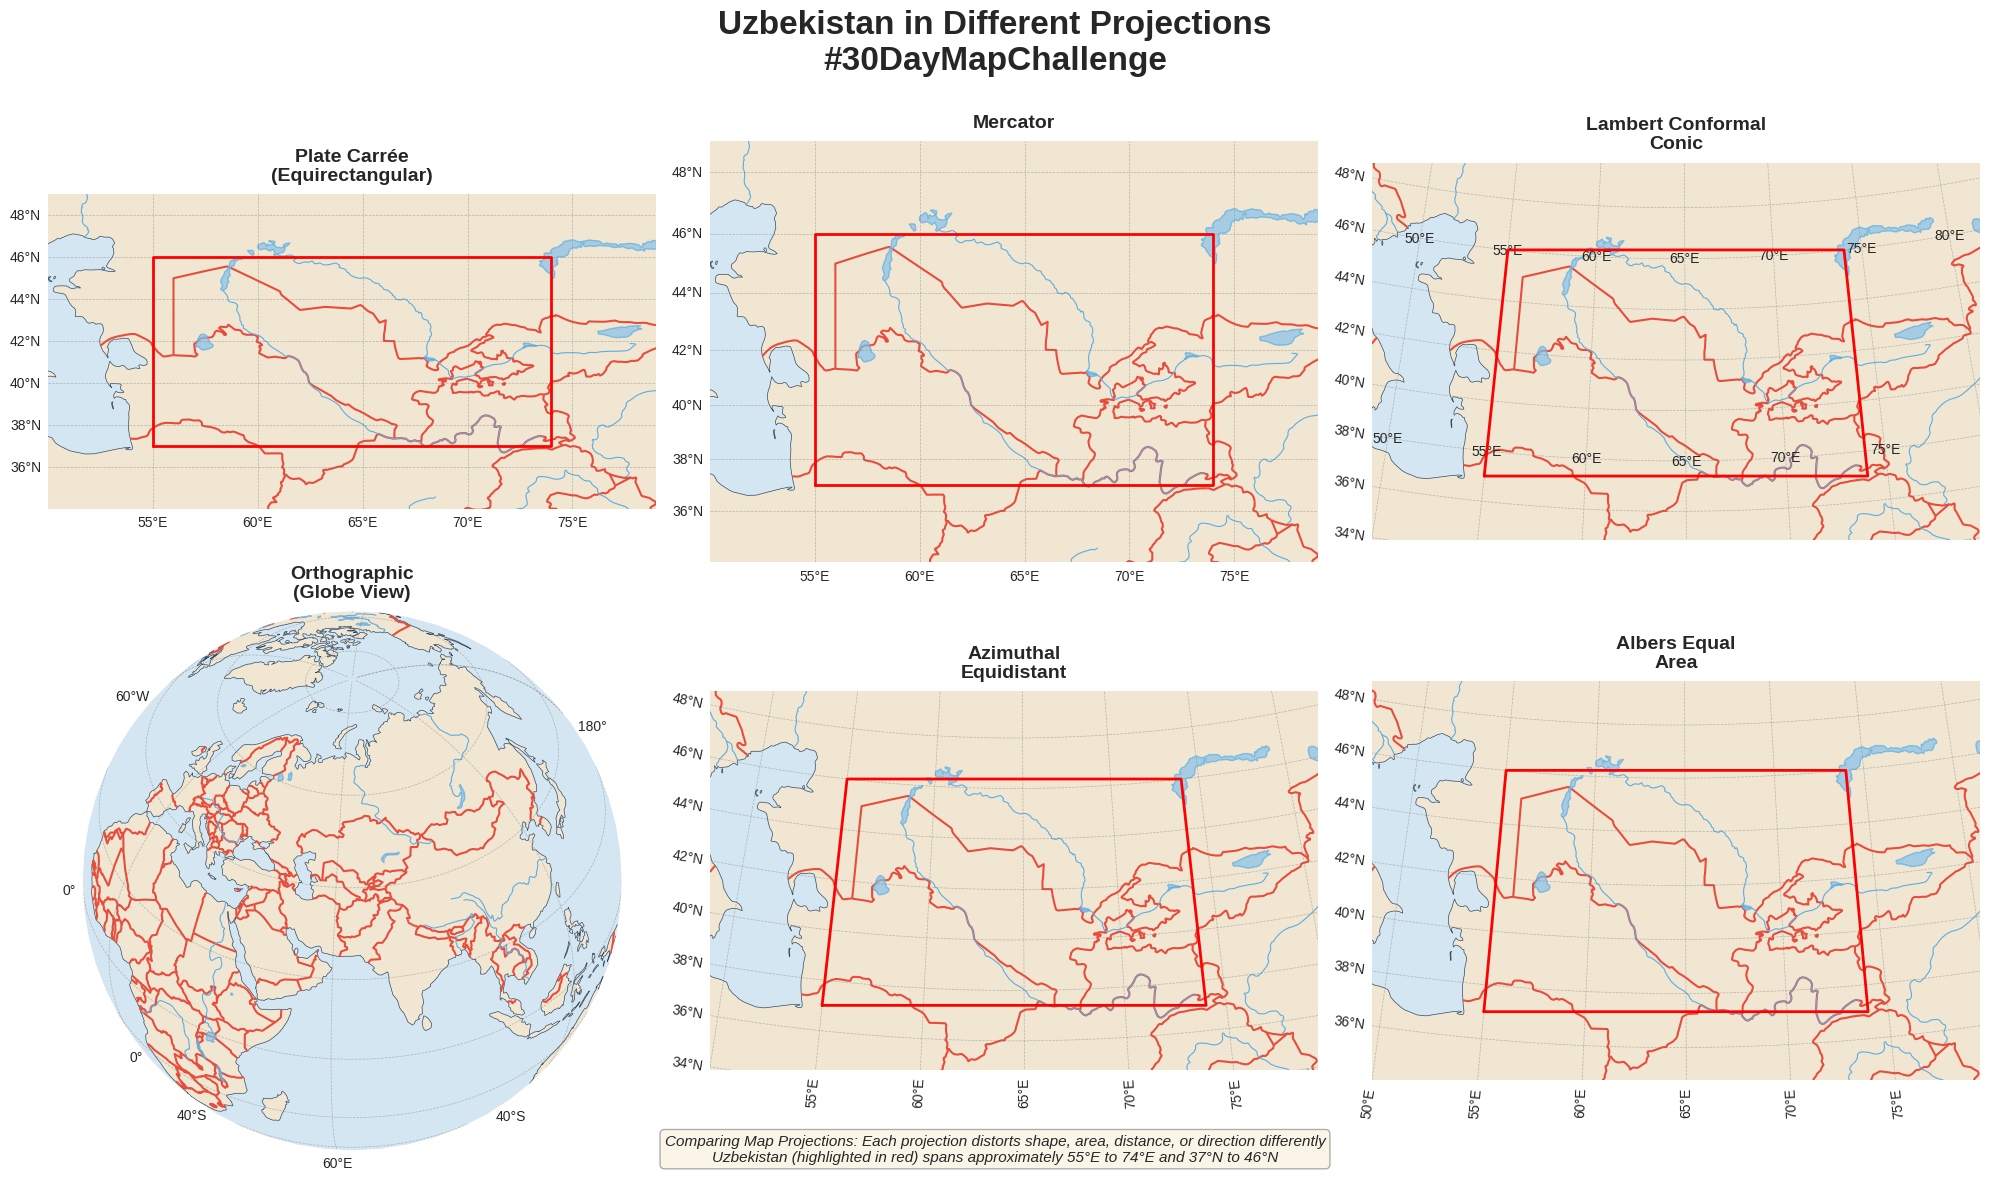

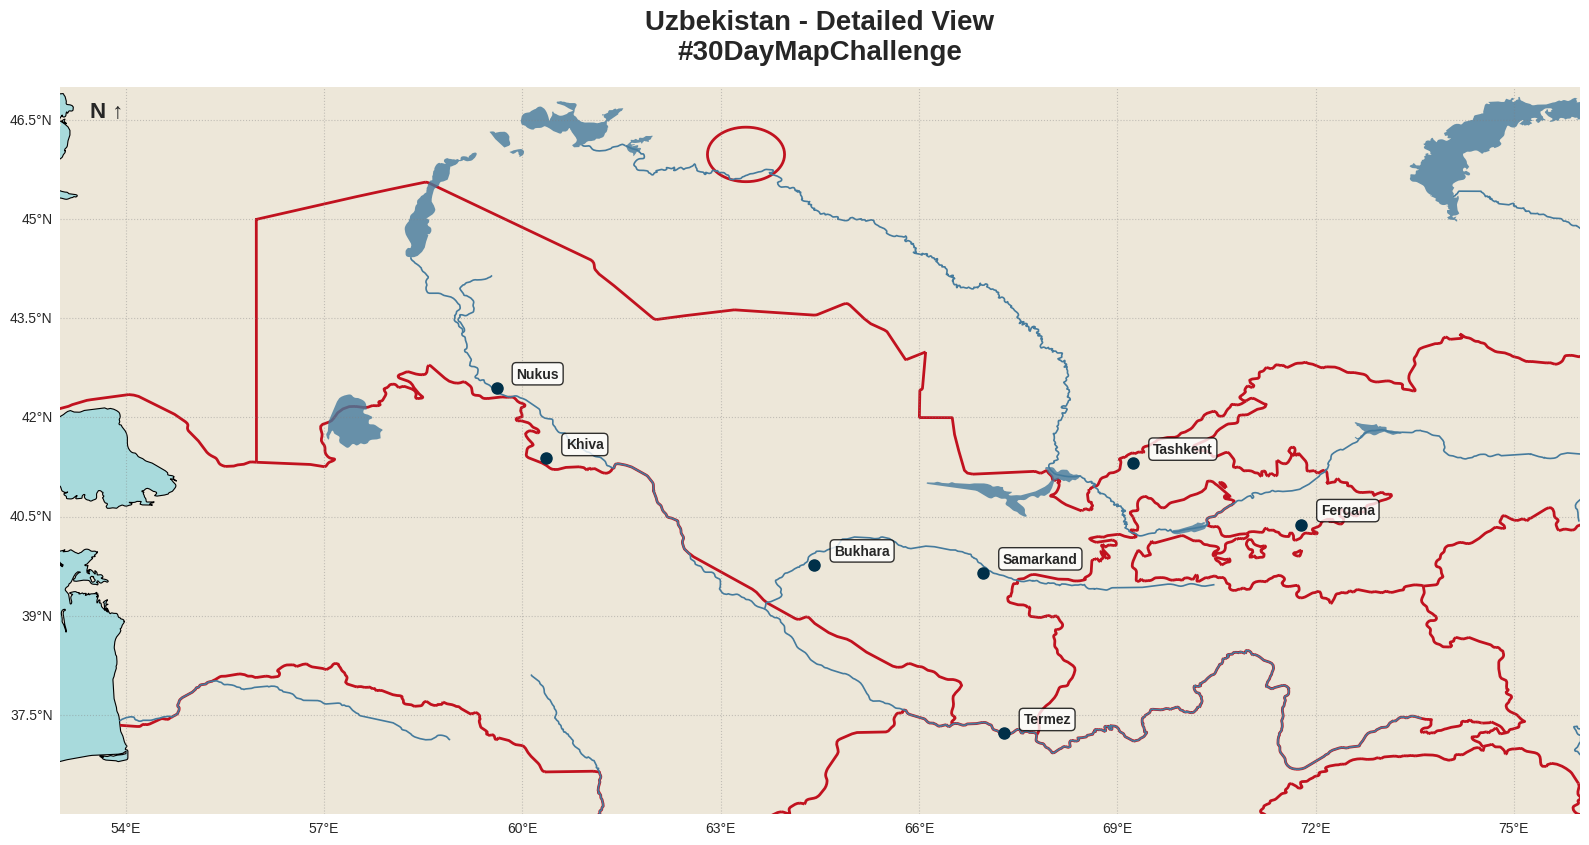

Maps created successfully!
Files saved as 'uzbekistan_projections.png' and 'uzbekistan_detailed.png'


In [3]:


# Set style
plt.style.use('seaborn-v0_8-darkgrid')

# Create figure with multiple projections
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Uzbekistan in Different Projections\n#30DayMapChallenge',
             fontsize=24, fontweight='bold', y=0.98)

# Define Uzbekistan's approximate bounds
uzbek_lon = [55, 74]
uzbek_lat = [37, 46]
center_lon = np.mean(uzbek_lon)
center_lat = np.mean(uzbek_lat)


# Create each subplot with different projection
for proj_info in projections:
    ax = fig.add_subplot(proj_info['pos'], projection=proj_info['proj'])

    # Set extent for non-global projections
    if proj_info['pos'] not in [234]:  # Not orthographic
        ax.set_extent([uzbek_lon[0]-5, uzbek_lon[1]+5,
                       uzbek_lat[0]-3, uzbek_lat[1]+3],
                      crs=ccrs.PlateCarree())

    # Add features
    ax.add_feature(cfeature.LAND, facecolor='#f0e6d2', edgecolor='none')
    ax.add_feature(cfeature.OCEAN, facecolor='#d4e6f1')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='#34495e')
    ax.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='#e74c3c', linestyle='-')
    ax.add_feature(cfeature.LAKES, facecolor='#85c1e9', edgecolor='#5dade2', alpha=0.7)
    ax.add_feature(cfeature.RIVERS, edgecolor='#5dade2', linewidth=0.8)

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5,
                      color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Add title
    ax.set_title(proj_info['name'], fontsize=14, fontweight='bold', pad=10)

    # Highlight Uzbekistan region with a box (in PlateCarree coordinates)
    if proj_info['pos'] != 234:  # Not for orthographic
        ax.plot([uzbek_lon[0], uzbek_lon[1], uzbek_lon[1], uzbek_lon[0], uzbek_lon[0]],
                [uzbek_lat[0], uzbek_lat[0], uzbek_lat[1], uzbek_lat[1], uzbek_lat[0]],
                color='red', linewidth=2, transform=ccrs.PlateCarree(),
                label='Uzbekistan Region')

# Add legend and info
fig.text(0.5, 0.02,
         'Comparing Map Projections: Each projection distorts shape, area, distance, or direction differently\n'
         'Uzbekistan (highlighted in red) spans approximately 55°E to 74°E and 37°N to 46°N',
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('uzbekistan_projections.png', dpi=300, bbox_inches='tight')
plt.show()

print("Maps created successfully!")
print("Files saved as 'uzbekistan_projections.png' and 'uzbekistan_detailed.png'")

In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 116.5 MB/s eta 0:00:00
